# Mental Health in the Tech Industry
TODO meaningful text
years 2016 - 2019

## Setup

### Import, Style and options

In [6]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

### Database/Dataframe

In [7]:
# Establish connection to db
con = sqlite3.connect('mental_health.sqlite')
cur = con.cursor()

In [8]:
# Transform 'Question' table into dataframe
questions = pd.read_sql_query("SELECT * FROM Question", con)

In [9]:
# Transform 'Answer' table into dataframe
df = pd.read_sql_query("SELECT * FROM Answer WHERE NOT SurveyID=2014", con)

In [10]:
# Change 'SurveyID' column into 'Year'
df.rename(columns={'SurveyID': 'Year'}, inplace = True)

### Functions

In [11]:
def get_valid_answers(question_id):
    return df[(df['QuestionID'] == question_id) & (df['AnswerText'] != -1)]

In [12]:
def append_count_in_percent(grouped_df):
    return (grouped_df['Count'] / grouped_df['Count'].sum())*100 

In [13]:
def append_count_in_percent_by_group(grouped_df, group_by_value):
    return (grouped_df['Count'] / grouped_df.groupby(group_by_value)['Count'].transform('sum'))*100

## Question catalogue

In [14]:
# Print all questions with id
questions

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [15]:
# Q1: "What is your age?"
q1 = get_valid_answers(1)

In [16]:
# Q2: "What is your gender?"
q2 = get_valid_answers(2)

In [17]:
# Q3: "What country do you live in?"
q3 = get_valid_answers(3)

In [18]:
# Q5: "Are you self-employed?"
q5 = get_valid_answers(5)

In [19]:
# Q13: "Is your primary role within your company related to tech/IT?"
q13 = get_valid_answers(13)

In [20]:
# Q32: "Have you had a mental health disorder in the past?"
q32 = get_valid_answers(32)

In [21]:
# Q33: "Do you currently have a mental health disorder?"
q33 = get_valid_answers(33)

In [22]:
# Q118: "Do you work remotely?"
q118 = get_valid_answers(118)

## Descriptive statistics

### Q1: Age distribution

### Q2: Gender distribution

In [23]:
# Change "AnswerText" to "Gender"
q2.rename(columns={'AnswerText': 'Gender'}, inplace = True)

In [24]:
# Capitalize all entries
q2.Gender = q2.Gender.str.capitalize()

In [25]:
# Change non-"Male" and non-"Female" answer to "Other"
q2['Gender'] = np.where(((q2.Gender != 'Male') & (q2.Gender != 'Female')), 'Other', q2.Gender)


In [26]:
# Group and count answers by year
q2_by_year = q2.groupby('Year').size().reset_index(name="Count")
q2_by_year['%'] = append_count_in_percent(q2_by_year)
q2_by_year

,Year,Count,%
0,2016,1433,48.444895
1,2017,756,25.557809
2,2018,417,14.097363
3,2019,352,11.899932


In [27]:
# Group and count answers by gender
q2_by_gender = q2.groupby('Gender').size().reset_index(name="Count") 
q2_by_gender['%'] = append_count_in_percent(q2_by_gender)
q2_by_gender

,Gender,Count,%
0,Female,777,26.267748
1,Male,2052,69.371197
2,Other,129,4.361055


In [28]:
# Group and count answers by year & gender
q2_by_gender_and_year = q2.groupby(['Gender', 'Year']).size().reset_index(name="Count") 
q2_by_gender_and_year['%'] = (q2_by_gender_and_year['Count'] / q2_by_gender_and_year.groupby('Year')['Count'].transform('sum'))*100 
q2_by_gender_and_year

,Gender,Year,Count,%
0,Female,2016,336,23.447313
1,Female,2017,218,28.835979
2,Female,2018,125,29.976019
3,Female,2019,98,27.840909
4,Male,2016,1057,73.761340
5,Male,2017,502,66.402116
6,Male,2018,266,63.788969
7,Male,2019,227,64.488636
8,Other,2016,40,2.791347
9,Other,2017,36,4.761905


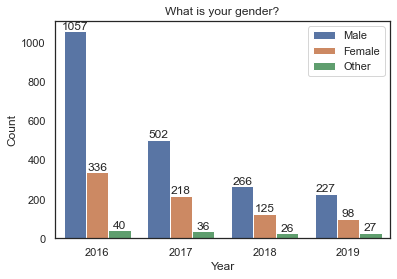

In [29]:
# Gender distribution, visualized
ax = sns.barplot(x = 'Year', y = 'Count', hue = 'Gender', data = q2_by_gender_and_year, hue_order=['Male', 'Female', 'Other'])
ax.set(title='What is your gender?')

# add labels to bars
for container in ax.containers:
    ax.bar_label(container)

# move hue box
ax.legend(bbox_to_anchor= (1,1))

### Q3: Origin distribution

### Q5: Self-employment ratio

In [30]:
# change: 1 -> Yes, 0 -> No
q5['AnswerText'] = np.where((q5.AnswerText == '1'), 'Yes', q5.AnswerText)
q5['AnswerText'] = np.where((q5.AnswerText == '0'), 'No', q5.AnswerText)

In [31]:
# Group and count by answer
q5_by_answer = q5.groupby('AnswerText').size().reset_index(name='Count')
q5_by_answer['%'] = append_count_in_percent(q5_by_answer)
q5_by_answer

,AnswerText,Count,%
0,No,2454,82.96146
1,Yes,504,17.03854


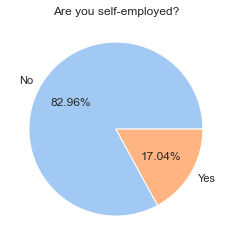

In [32]:
# Self-employed, visualized
plt.pie(q5_by_answer['%'], labels=q5_by_answer['AnswerText'], colors = sns.color_palette('pastel'), autopct='%.2f%%')
plt.title('Are you self-employed?')
plt.show()

### Q13: Primary role in company

### Q33: Mental health disorder

## Hypotheses

### Die Häufigkeit psychischer Erkrankungen nimmt jährlich zu

In [33]:
# change answer 'Maybe' to 'Possibly' to standardize answers
q33['AnswerText'] = np.where((q33.AnswerText == 'Maybe'), 'Possibly', q33.AnswerText)

In [34]:
# Remove rows with 'Don't Know' as AnswerText
q33 = q33.drop(q33[q33.AnswerText == 'Don\'t Know'].index)

In [35]:
# Group and count by Answer and Year
q33_by_answer_and_year = q33.groupby(['AnswerText', 'Year']).size().reset_index(name='Count')
q33_by_answer_and_year['%'] = append_count_in_percent_by_group(q33_by_answer_and_year, 'Year')
q33_by_answer_and_year

,AnswerText,Year,Count,%
0,No,2016,531,37.055129
1,No,2017,222,32.173913
2,No,2018,112,29.090909
3,No,2019,104,31.901840
4,Possibly,2016,327,22.819260
5,Possibly,2017,144,20.869565
6,Possibly,2018,82,21.298701
7,Possibly,2019,75,23.006135
8,Yes,2016,575,40.125611
9,Yes,2017,324,46.956522


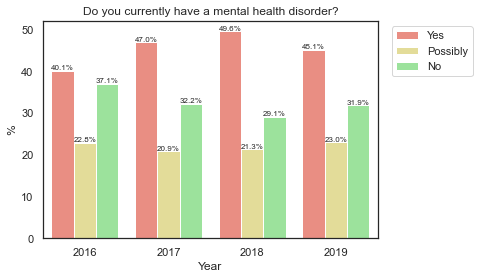

In [36]:
# Currently affected by a mental disorder, visualized
ax = sns.barplot(x = 'Year', y = '%', hue = 'AnswerText', data = q33_by_answer_and_year, hue_order=['Yes', 'Possibly', 'No'], palette=['salmon', 'khaki', 'lightgreen'])
ax.set(title='Do you currently have a mental health disorder?')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=8)

# move hue box
ax.legend(bbox_to_anchor= (1.3,1))

### Menschen in der Tech-Industrie sind häufiger von einer psychischen Erkrankung betroffen

### Männer sind häufiger von psychischen Erkrankungen betroffen als Frauen

### Selbstständige sind häufiger von psychischen Erkrankungen betroffen

In [62]:
## Self-employed and had metal disorder
q5_q32 = pd.merge(q5, q32, on='UserID', how='inner')
# Change "AnswerText_x to "self_employed"
q5_q32.rename(columns={'AnswerText_x': 'self_employed'}, inplace = True)
# Change "AnswerText_y to "had_mental_disorder"
q5_q32.rename(columns={'AnswerText_y': 'had_mental_disorder'}, inplace = True)
#remove invalid entries
q5_q32 = q5_q32.drop(q5_q32[q5_q32.had_mental_disorder == '-1'].index)
#Add Count and % Column
self_employed_mental_disorder = q5_q32.groupby(['self_employed', 'had_mental_disorder']).size().reset_index(name='Count')
temp = self_employed_mental_disorder['Count'].sum()
self_employed_mental_disorder['%'] = (self_employed_mental_disorder['Count'] / temp)*100
self_employed_mental_disorder


,self_employed,had_mental_disorder,Count,%
0,No,Don't Know,94,3.194020
1,No,Maybe,184,6.252124
2,No,No,762,25.891947
3,No,Possibly,235,7.985049
4,No,Yes,1167,39.653415
5,Yes,Don't Know,15,0.509684
6,Yes,Maybe,62,2.106694
7,Yes,No,134,4.553177
8,Yes,Possibly,40,1.359157
9,Yes,Yes,250,8.494733


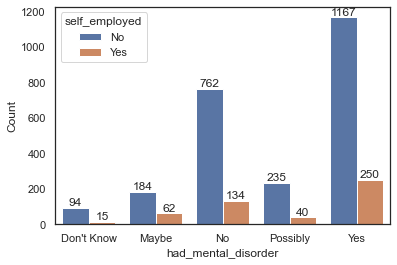

In [63]:
#self employed and had mental disorder, visualized
ax = sns.barplot(x= 'had_mental_disorder', y='Count', hue='self_employed', data= self_employed_mental_disorder)

#add labels to bars
for container in ax.containers:
    ax.bar_label(container)

### Menschen im Home-Office sind häufiger von psychischen Erkrankungen betroffen als Angestellte

### Eine psychische Erkrankung wird eher mit Kollgegen besprochen als mit den Vorgesetzten